In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
path='/Users/meiyewang/Desktop/code/GLResult/Sep/2030_5_battery_8_renewable_0.56_charger_base_regulation_base/'
revenue=pd.read_csv(path+'2030_5_battery_8_renewable_0.56_charger_base_regulation_base_247_Revenue.csv')#[['gen_capacity_veh'	,'regup_capacity_veh',	'regdown_capacity_veh']]

# revenue=pd.read_csv()
revenue
# revenue.iloc[4,0]
# DemandCost=0
# GenerationRevenue=0
# RegUpRev=0
# RegDownRev=0
# RevenueTotal=0

# for i in range(revenue.shape[0]):
#     DemandCost+=float(revenue.iloc[i,0])/1000000/1.29
#     GenerationRevenue+=float(revenue.iloc[i,1])/1000000/1.29
#     RegUpRev+=float(revenue.iloc[i,2])/1000000/1.29
#     RegDownRev+=float(revenue.iloc[i,3])/1000000/1.29
#     RevenueTotal+=float(revenue.iloc[i,4])/1000000/1.29

# d = 
# df = pd.DataFrame(data=d)
# df
# # batteryCostSum=(DemandCost+GenerationRevenue+RegUpRev+RegDownRev+RevenueTotal)*


,DemandCost,GenerationRevenue,RegUpRev,RegDownRev,RevenueTotal
0,598425.730775,0.0,0.0,8075.987808,-590349.742967
1,680679.070504,0.0,0.0,8325.420712,-672353.649792
2,661769.054142,0.0,0.0,8786.645792,-652982.408350
3,749793.919073,0.0,0.0,8331.092000,-741462.827073
4,891767.274646,0.0,0.0,8678.082000,-883089.192646


In [67]:
aggregatedRevenue=revenue.sum()/1000000/1.29

df=pd.DataFrame(data={  'Charge Cost': [-aggregatedRevenue[0]],
                        'Discharge Revenue': [aggregatedRevenue[1]],
                        'Regulation Up Revenue':[aggregatedRevenue[2]],
                        'Regulation Down Revenue':[aggregatedRevenue[3]],
                        'Net Revenue':[aggregatedRevenue[4]]})

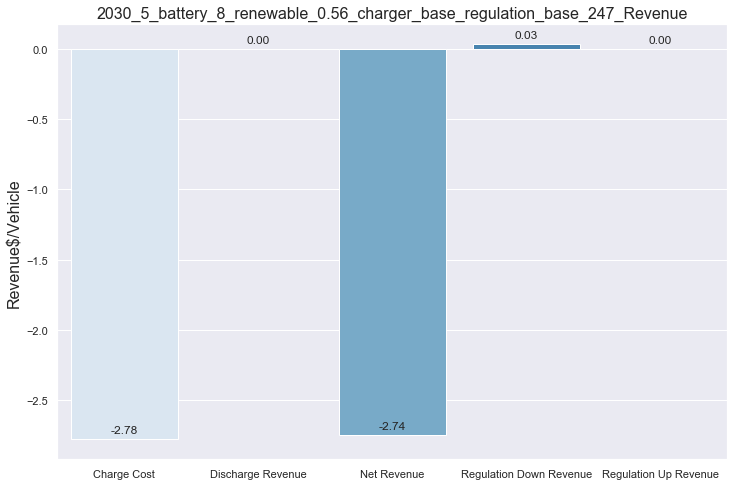

In [81]:
# plt.title('2025_1_battery_12_renewable_0.44_July '+str(round((revenue-batteryCostSum)/vehicleNumber,3))+'$/vehicle')
plt.title('2030_5_battery_8_renewable_0.56_charger_base_regulation_base_247_Revenue',size=16)
# plt.xlabel("Category")
plt.ylabel("Revenue$/Vehicle",size=16)
# sns.set(font_scale=10)
sns.set(rc={'figure.figsize':(15,10)})
# plt.plot()
splot=sns.barplot(data=df, palette="Blues")#.get_figure()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
# show_values_on_bars(sns, "h", 0.3)
# # plt.show()
# for index, row in df.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

# will add value
# labels

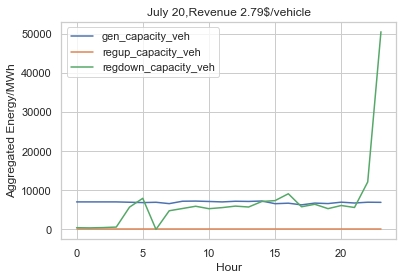

In [56]:
veh0=pd.read_csv('../Result/Summer/2025_1_battery_12_renewable_0.44_201_vehicleGeneration.csv')[['gen_capacity_veh'	,'regup_capacity_veh',	'regdown_capacity_veh']]
veh0.sum()
sns.set()
sns.set_style("whitegrid")
sns.color_palette("Set2")
vehicleNumber=1290000

revenue=7632248.077756238
batteryCostSum=veh0.sum().sum()*12

plt.title('July 20,Revenue '+str(round((revenue-batteryCostSum)/vehicleNumber,3))+'$/vehicle')
plt.xlabel("Hour")
plt.ylabel("Aggregated Energy/MWh")
sns.lineplot(data=veh0,dashes=False).get_figure()#.savefig("../Figure/501Project/Jan01_8.png")
plt.show()

In [101]:
import cPickle as pickle

with open(str(path)+'/project_vehicle.pkl', 'rb') as inputs:
    vehicle=pickle.load(inputs)
# type(vehicle[0])
# isinstance(vehicle[1].activities[0], Parked)
# isinstance(vehicle[1].activities[0],Parked)


False

In [137]:
# vehicle[1].activities[0].start
# vehicle[1].activities
distance=[]
totaldis=0
time=[]
location=[]
for i in range(20):
    if hasattr(vehicle[1].activities[i],'distance'):
        totaldis+=vehicle[1].activities[i].distance
        distance.append(totaldis)
        print(totaldis)
        location.append('Driving')
    else:
        distance.append(totaldis)
        location.append(vehicle[1].activities[i].location.name)
    time.append(str(vehicle[1].activities[i].start)[11:16])
activity=pd.DataFrame(data={'time': time,
                    'distance':distance,
                    'location':location})
activity

17.70274
35.40548
59.54558
91.73238
120.7005
121.415762222
153.602562222
166.477282222
185.789362222
205.101442222


,distance,location,time
0,0.000000,Home01,00:00
1,17.702740,Driving,07:18
2,17.702740,School/Church01,07:29
3,35.405480,Driving,07:30
4,35.405480,Home01,07:45
5,59.545580,Driving,09:00
6,59.545580,School/Church01,09:15
7,91.732380,Driving,09:20
8,91.732380,Medical/Dental01,09:50
9,120.700500,Driving,10:30


In [142]:
type(activity.distance[1])

numpy.float64

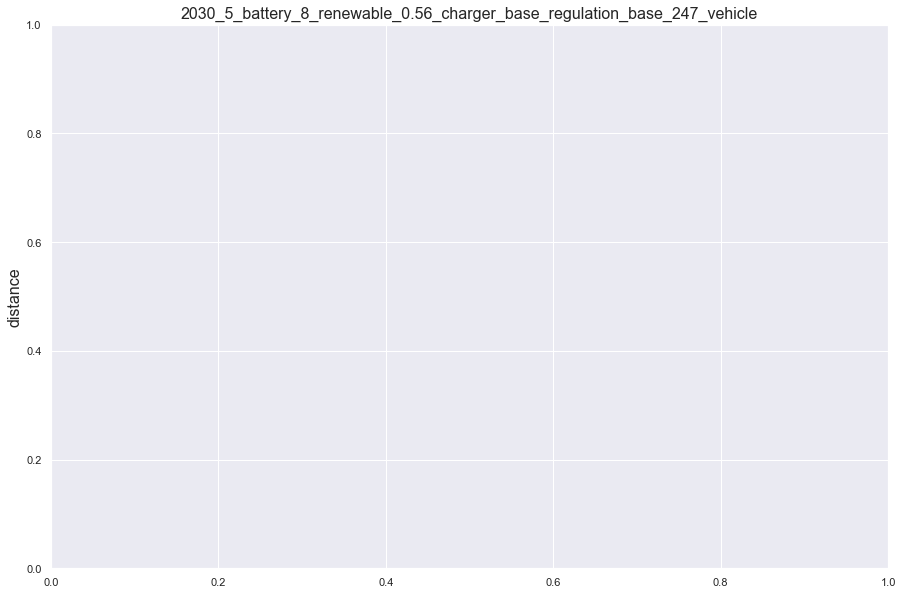

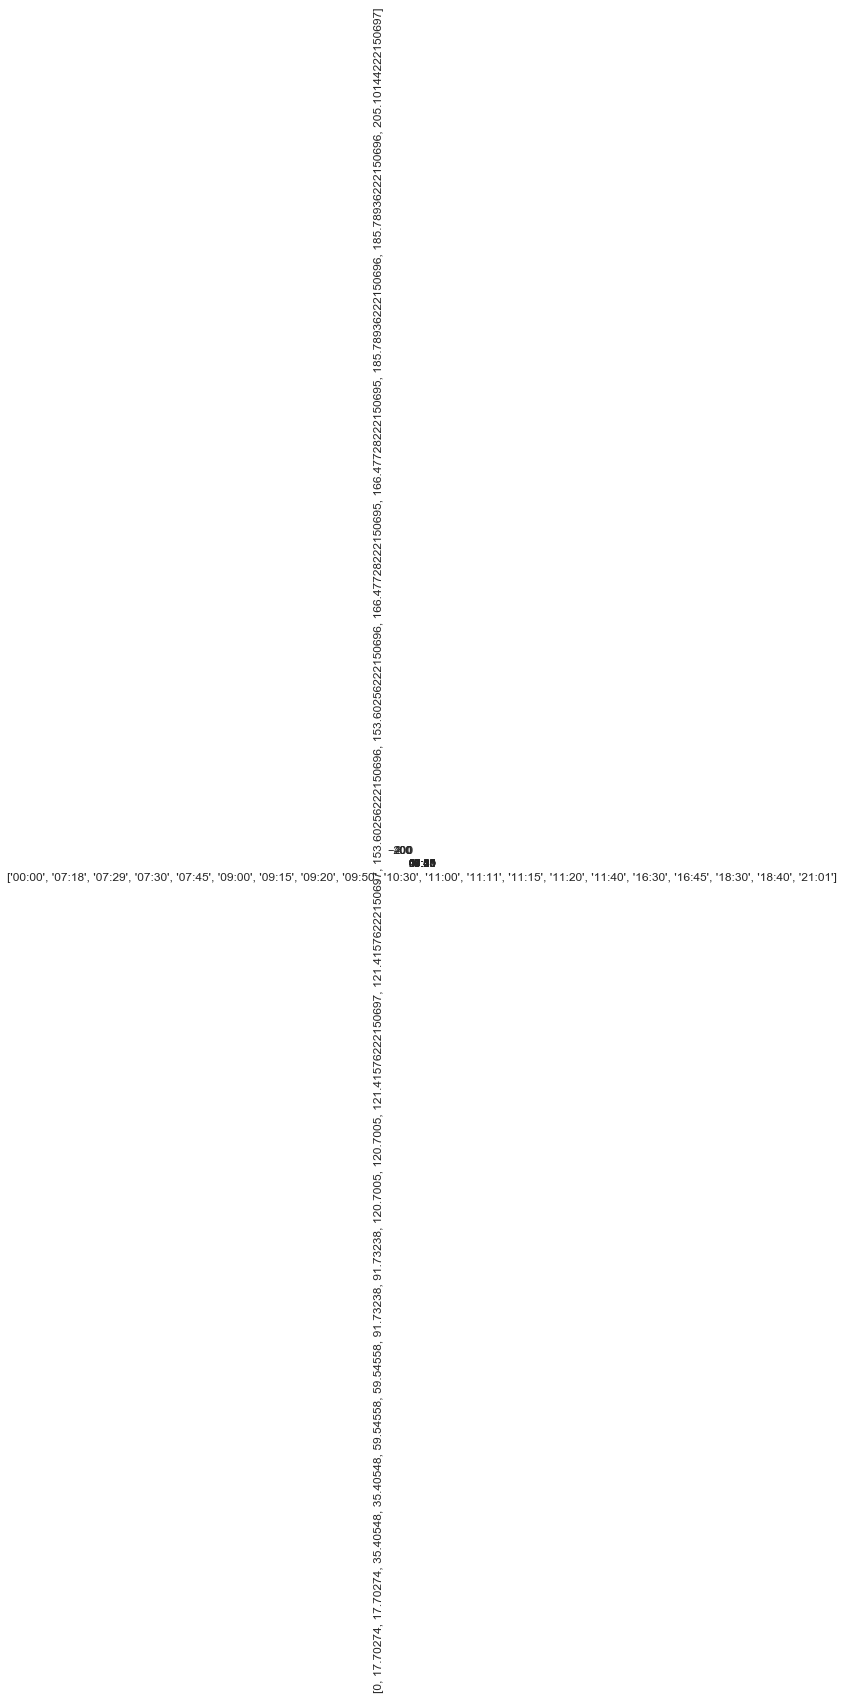

In [140]:
plt.title('2030_5_battery_8_renewable_0.56_charger_base_regulation_base_247_vehicle',size=16)
# plt.xlabel("Category")
plt.ylabel("distance",size=16)
# sns.set(font_scale=10)
sns.set(rc={'figure.figsize':(15,10)})
# plt.plot()
splot=sns.relplot(data=activity, x=time,y=distance,kind="line",palette="Blues")

In [52]:
getattribute(vehicle[1])

NameError: name 'getattribute' is not defined

In [57]:
vehCap=pd.read_csv('../Result/2025_1_battery_12_renewable_0.44_182_vehicleGeneration.csv',header=0)
vehCap=pd.concat([vehCap,vehCap],ignore_index=True)
vehCap_v2g=vehCap[:25]
vehCap_v2g

,Generator,Day,Hour,gen_capacity_veh,regup_capacity_veh,regdown_capacity_veh
0,vehicle,1,1,6568.680000,0.0,2633.496756
1,vehicle,1,2,6568.680000,0.0,3343.061554
2,vehicle,1,3,6568.680000,0.0,1953.331157
3,vehicle,1,4,6568.680000,0.0,2083.350000
4,vehicle,1,5,6550.620000,0.0,4778.367681
5,vehicle,1,6,6362.280000,0.0,9376.309610
6,vehicle,1,7,6260.370000,0.0,0.000000
7,vehicle,1,8,5915.510000,0.0,5183.400004
8,vehicle,1,9,6499.880000,0.0,5368.386960
9,vehicle,1,10,6837.430000,0.0,6688.766201


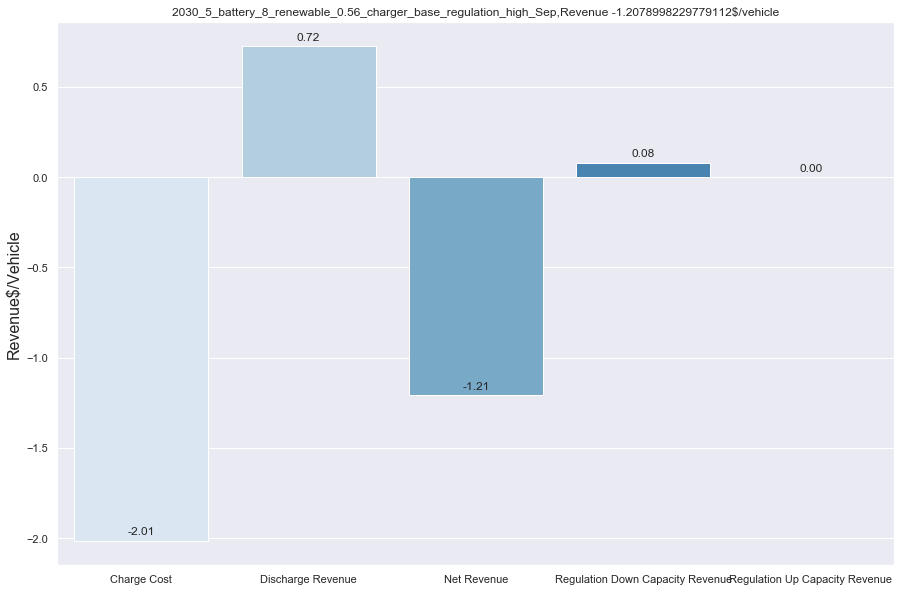

In [157]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle as pickle
# def show1():
#     print(1)
# show1()
def revenueVisualization(year,month,day,run_no,batteryCost,renewablePercentage,charger,regulation,timeRange,V1G=False):
    if V1G:
        versionName='V1G'+str(year)+'_'+str(run_no)+'_battery_'+str(batteryCost)+'_renewable_'+str(renewablePercentage)+'_charger_'+str(charger)+'_regulation_'+str(regulation)
    else:
        versionName=str(year)+'_'+str(run_no)+'_battery_'+str(batteryCost)+'_renewable_'+str(renewablePercentage)+'_charger_'+str(charger)+'_regulation_'+str(regulation)
    
    if year==2025:
        total_number_of_vehicles=1290000
    elif year==2030:
        total_number_of_vehicles=4196727
    elif year==2020:
        total_number_of_vehicles=967897

    path='../GLResult/'+month+'/'+versionName # path='../GLResult/Result/'+month+'/'+versionName
    revenue=pd.read_csv(path+'/'+versionName+'_'+str(day)+'_Revenue.csv')#[['gen_capacity_veh'	,'regup_capacity_veh',	'regdown_capacity_veh']]

    aggregatedRevenue=revenue.sum()/total_number_of_vehicles

    # batteryCostSum=revenue.sum().sum()*batteryCost

    df=pd.DataFrame(data={  'Charge Cost': [-aggregatedRevenue[0]],
                        'Discharge Revenue': [aggregatedRevenue[1]],
                        'Regulation Up Capacity Revenue':[aggregatedRevenue[2]],
                        'Regulation Down Capacity Revenue':[aggregatedRevenue[3]],
                        'Net Revenue':[aggregatedRevenue[4]]})
    plt.title(versionName+'_'+month+',Revenue '+str(aggregatedRevenue[4])+'$/vehicle')#round((revenue-batteryCostSum)/total_number_of_vehicles,3)
    # plt.xlabel("Category")
    plt.ylabel("Revenue$/Vehicle",size=16)
    # sns.set(font_scale=10)
    sns.set(rc={'figure.figsize':(15,10)})
    # plt.plot()
    splot=sns.barplot(data=df, palette="Blues")#.get_figure()
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    # splot
    # return splot#.get_figure()
revenueVisualization(2030,'Sep',269,5,8,0.56,'base','high','monthly')#1290000


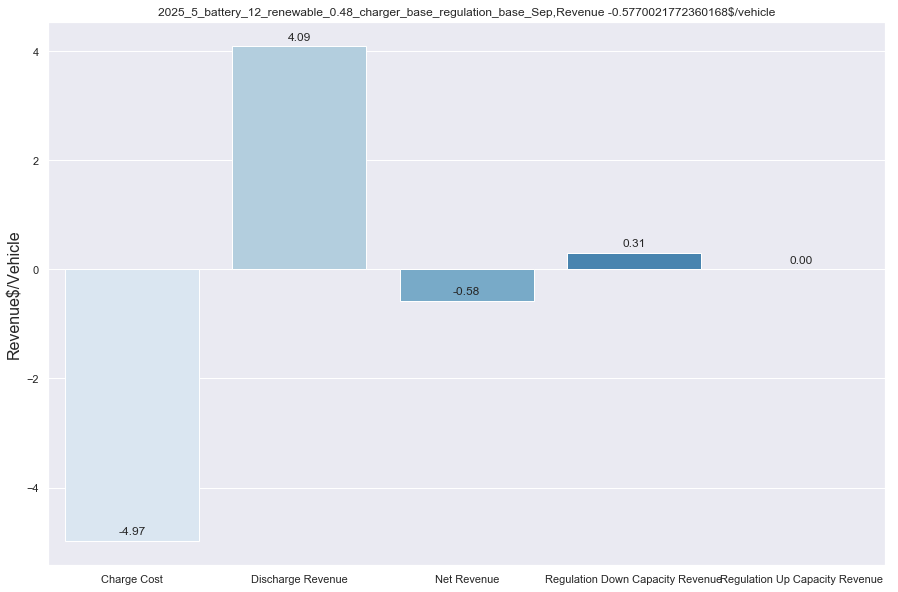

In [158]:
revenueVisualization(2025,'Sep',272,5,12,0.48,'base','base','monthly')#


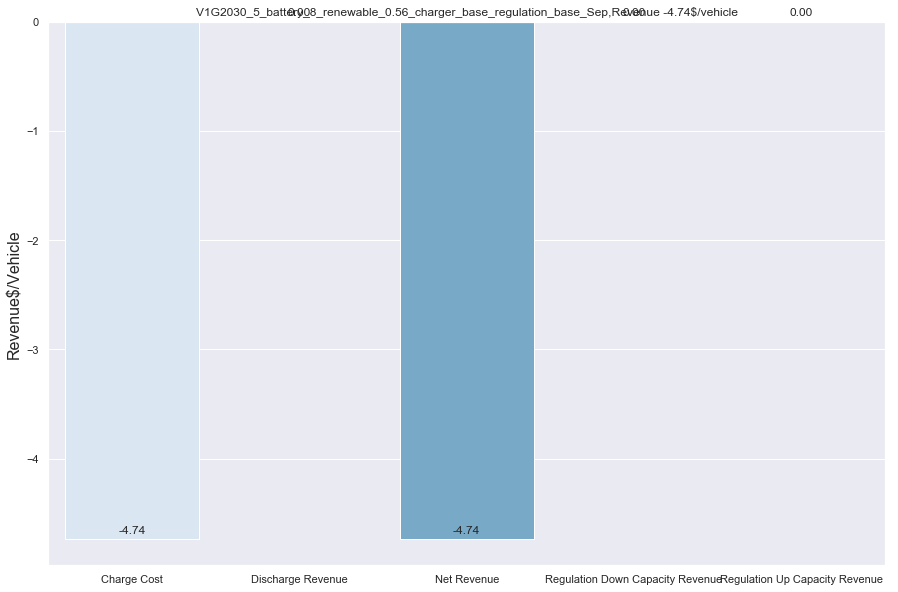

In [166]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle as pickle
# def show1():
#     print(1)
# show1()
def revenueVisualization(year,month,day,run_no,batteryCost,renewablePercentage,charger,regulation,timeRange,V1G=False):
    if V1G:
        versionName='V1G'+str(year)+'_'+str(run_no)+'_battery_'+str(batteryCost)+'_renewable_'+str(renewablePercentage)+'_charger_'+str(charger)+'_regulation_'+str(regulation)
    else:
        versionName=str(year)+'_'+str(run_no)+'_battery_'+str(batteryCost)+'_renewable_'+str(renewablePercentage)+'_charger_'+str(charger)+'_regulation_'+str(regulation)
    
    if year==2025:
        total_number_of_vehicles=1290000
    elif year==2030:
        total_number_of_vehicles=4196727
    elif year==2020:
        total_number_of_vehicles=967897
    
    path='../Result/'+month+'/'+versionName # path='../GLResult/Result/'+month+'/'+versionName
    revenue=pd.read_csv(path+'/'+versionName+'_'+str(day)+'_Revenue.csv')#[['gen_capacity_veh'	,'regup_capacity_veh',	'regdown_capacity_veh']]

    aggregatedRevenue=revenue.sum()/total_number_of_vehicles

    # batteryCostSum=revenue.sum().sum()*batteryCost

    df=pd.DataFrame(data={  'Charge Cost': [-aggregatedRevenue[0]],
                        'Discharge Revenue': [aggregatedRevenue[1]],
                        'Regulation Up Capacity Revenue':[aggregatedRevenue[2]],
                        'Regulation Down Capacity Revenue':[aggregatedRevenue[3]],
                        'Net Revenue':[aggregatedRevenue[4]]})
    plt.title(versionName+'_'+month+',Revenue '+str(round((aggregatedRevenue[4]),2))+'$/vehicle')#round((revenue-batteryCostSum)/total_number_of_vehicles,3)
    # plt.xlabel("Category")
    plt.ylabel("Revenue$/Vehicle",size=16)
    # sns.set(font_scale=10)
    sns.set(rc={'figure.figsize':(15,10)})
    # plt.plot()
    splot=sns.barplot(data=df, palette="Blues")#.get_figure()
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    # splot
    # return splot#.get_figure()
revenueVisualization(2030,'Sep',272,5,8,0.56,'base','base','monthly',V1G=True)#1290000


In [ ]:
revenueVisualization(2025,'Sep',272,5,12,0.56,'base','base','monthly',V1G=True)#1290000

In [181]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle as pickle

def energyVisualization(year,month,day,run_no,batteryCost,renewablePercentage,regulation,timeRange,V1G=False):
    if V1G:
        versionName='V1G'+str(year)+'_'+str(run_no)+'_battery_'+str(batteryCost)+'_renewable_'+str(renewablePercentage)+'_charger_'+str(charger)+'_regulation_'+str(regulation)
    else:
        versionName=str(year)+'_'+str(run_no)+'_battery_'+str(batteryCost)+'_renewable_'+str(renewablePercentage)+'_charger_'+str(charger)+'_regulation_'+str(regulation)
    
    if year==2025:
        total_number_of_vehicles=1290000
    elif year==2030:
        total_number_of_vehicles=4196727
    elif year==2020:
        total_number_of_vehicles=967897

    path='../GLResult/'+month+'/'+versionName # path='../GLResult/Result/'+month+'/'+versionName
    revenue=pd.read_csv(path+'/'+versionName+'_'+str(day)+'_Revenue.csv')#[['gen_capacity_veh'	,'regup_capacity_veh',	'regdown_capacity_veh']]

    aggregatedRevenue=revenue.sum()/total_number_of_vehicles

    # batteryCostSum=revenue.sum().sum()*batteryCost

    df=pd.DataFrame(data={  'Charge Cost': [-aggregatedRevenue[0]],
                        'Discharge Revenue': [aggregatedRevenue[1]],
                        'Regulation Up Capacity Revenue':[aggregatedRevenue[2]],
                        'Regulation Down Capacity Revenue':[aggregatedRevenue[3]],
                        'Net Revenue':[aggregatedRevenue[4]]})
    plt.title(versionName+'_'+month+',Revenue '+str(aggregatedRevenue[4])+'$/vehicle')#round((revenue-batteryCostSum)/total_number_of_vehicles,3)
    # plt.xlabel("Category")
    plt.ylabel("Revenue$/Vehicle",size=16)
    # sns.set(font_scale=10)
    sns.set(rc={'figure.figsize':(15,10)})
    # plt.plot()
    splot=sns.barplot(data=df, palette="Blues")#.get_figure()
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    # splot
    # return splot#.get_figure()
revenueVisualization(2030,'Sep',269,5,8,0.56,'base','high','monthly')#1290000


,Unnamed: 0,netload
1632,3/10/19 00:00,21480
1633,3/10/19 01:00,20612
1634,3/10/19 03:00,20219
1635,3/10/19 04:00,19724
1636,3/10/19 05:00,20021
1637,3/10/19 06:00,20703
1638,3/10/19 07:00,21166
1639,3/10/19 08:00,21295
1640,3/10/19 09:00,20996
1641,3/10/19 10:00,20112
